
# Sécurité dans les réseaux et protection de contenus audio-visuels
## Membre

| Prénom   |      NOM      |  Nombre etudiant |
|----------|:-------------:|------:|
| Duong Phuc Tai |  NGUYEN | 12108339 |
| Kamilia |    RAHIL   |   12109923 |

## TP3 – SPREAD SPECTRUM WATERMARKING
1. Off-the-shell random number generators - principles
4. Conclusion

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## criteria library
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim


In [2]:
## set the necessary path

_DATA = './data'
_RESULT = './result'

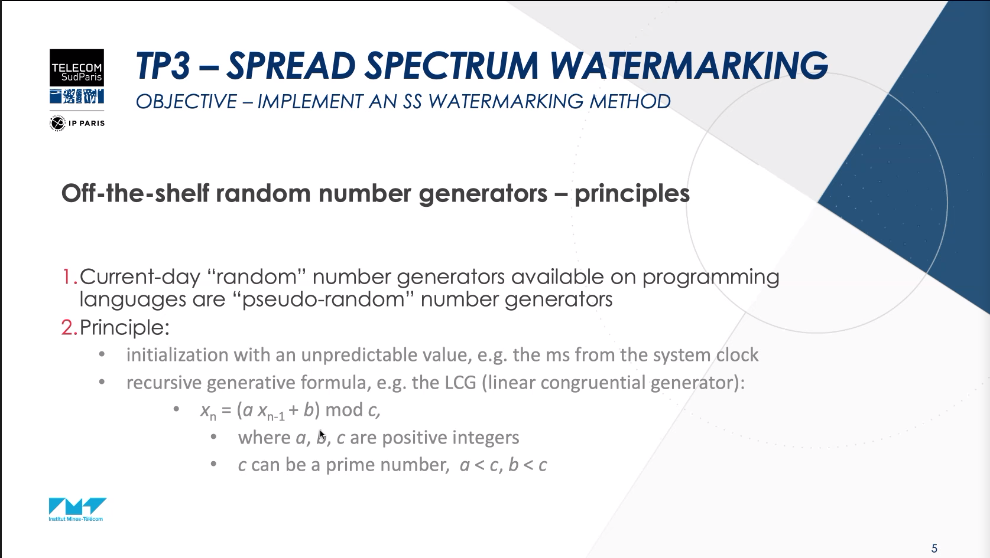
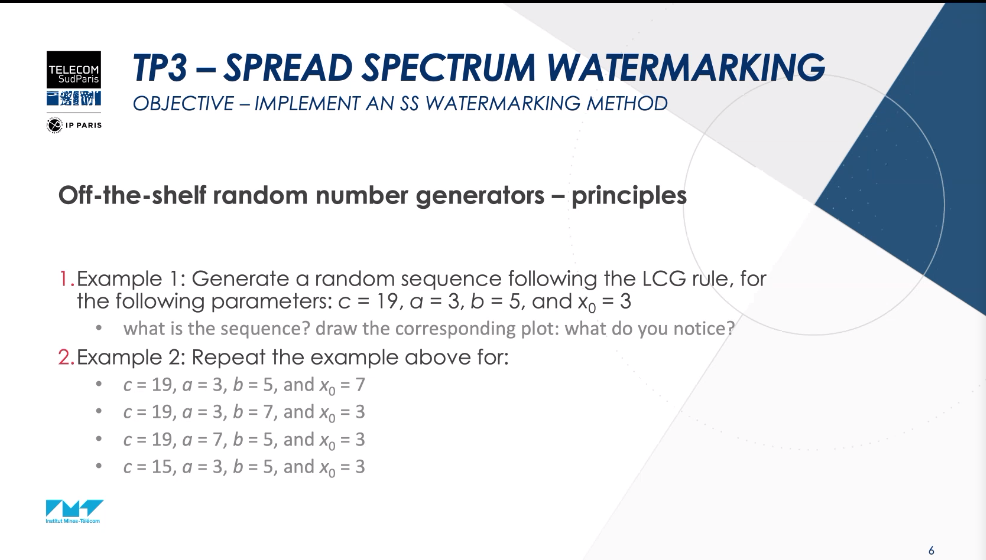

In [3]:
def lcg(c, a, b, x0):
    x = np.zeros(c)
    x[0] = x0
    for i in range(1,c):
        x[i] = np.mod((a*x[i-1] + b), c)
    return x

[ 3. 14.  9. 13.  6.  4. 17. 18.  2. 11.  0.  5.  1.  8. 10. 16. 15. 12.
  3.]


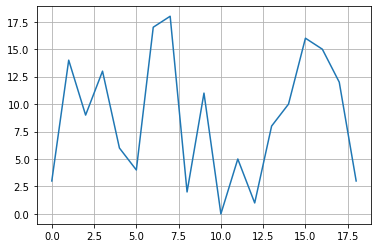

In [4]:
seq_rand = lcg(c=19, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]


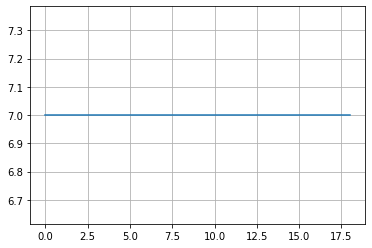

In [5]:
seq_rand = lcg(c=19, a=3, b=5, x0=7)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 16. 17.  1. 10. 18.  4.  0.  7.  9. 15. 14. 11.  2. 13.  8. 12.  5.
  3.]


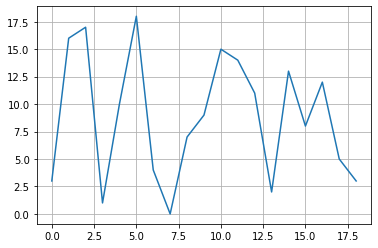

In [6]:
seq_rand = lcg(c=19, a=3, b=7, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.
  3.]


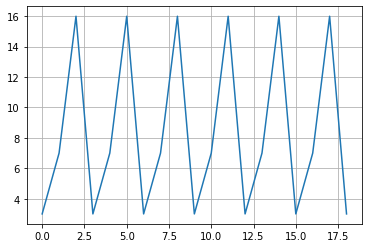

In [7]:
seq_rand = lcg(c=19, a=7, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2.]


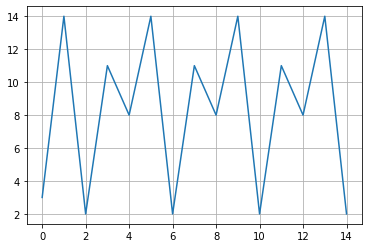

In [8]:
seq_rand = lcg(c=15, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

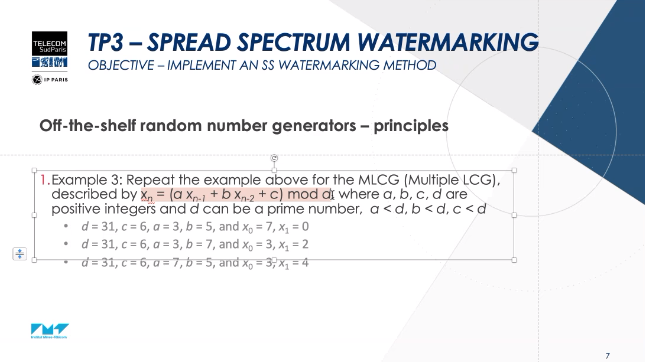

In [9]:
def mlcg(d, c, a, b, x0, x1):
    x = np.zeros(d)
    x[0] = x0
    x[1] = x1
    for i in range(1,d):
        x[i] = np.mod((a*x[i-1] + b*x[i-2] + c), d)
    return x

[ 7. 27. 29. 11. 29. 24.  6. 20.  3. 22. 25.  5. 22.  4.  4.  7. 16. 27.
 12. 22.  8. 16.  1. 27. 30. 14. 12. 19. 30.  5. 16.]


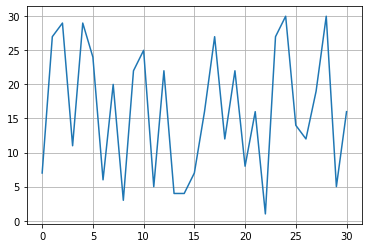

In [10]:
seq_rand = mlcg(d=31, c=6, a=3, b=5, x0=7, x1=0)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 15. 10. 17.  3. 10. 26. 30. 30. 27. 18.  1. 11. 15.  4. 30.  0. 30.
  3.  8. 20. 29. 16.  9. 21.  8. 22.  4. 17. 23.  8.]


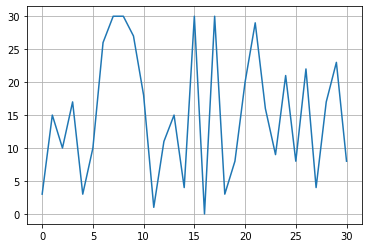

In [11]:
seq_rand = mlcg(d=31, c=6, a=3, b=7, x0=3, x1=2)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 27. 24. 30. 26. 28. 22. 21. 15. 30. 12. 23. 10.  5. 29. 17. 22. 28.
  2.  5. 20. 16.  1.  0. 11. 21. 22. 17. 18.  0.  3.]


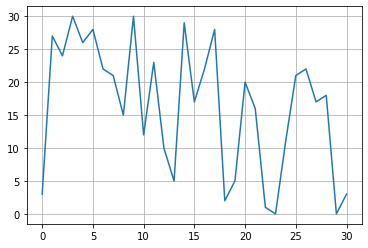

In [12]:
seq_rand = mlcg(d=31, c=6, a=7, b=5, x0=3, x1=4)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

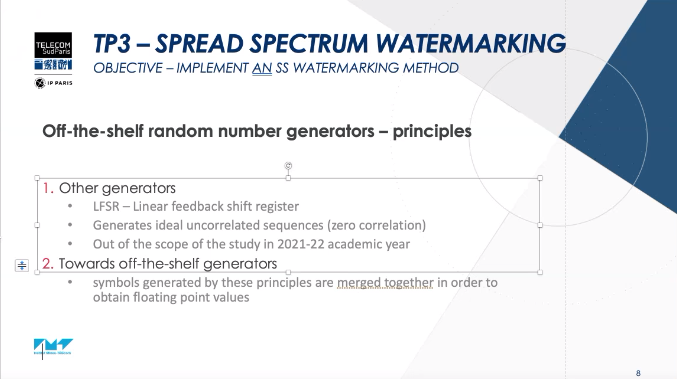
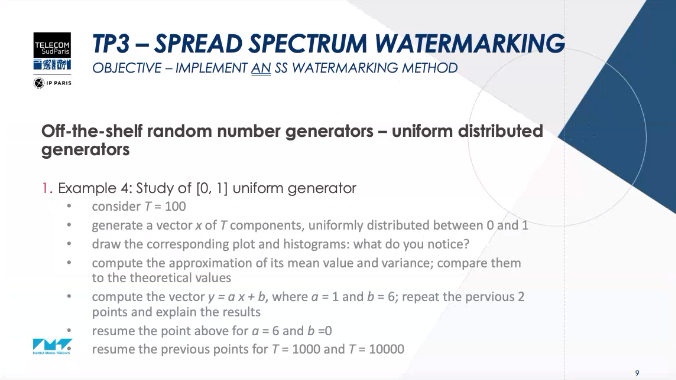

Mean: 16.387; Variance: 95.140


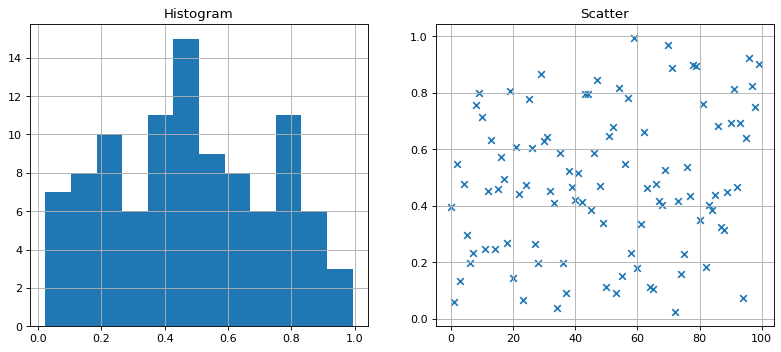

In [13]:
T = 100
seq_uni = np.random.rand(T)
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(seq_uni, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), seq_uni,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(seq_rand):.3f}; Variance: {np.var(seq_rand):.3f}') 

Mean: 6.481; Variance: 0.064


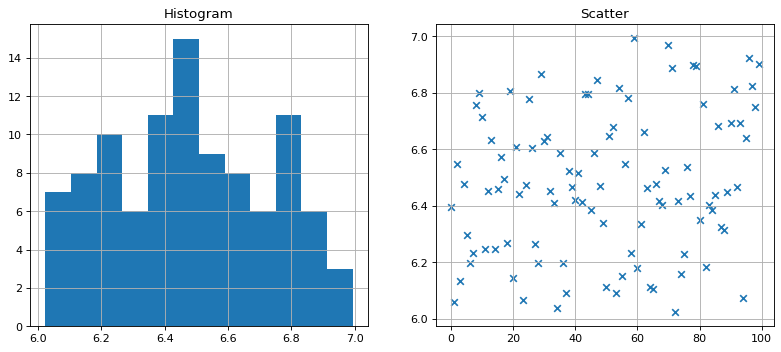

In [14]:
a = 1
b = 6
y = seq_uni*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()

print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 2.887; Variance: 2.300


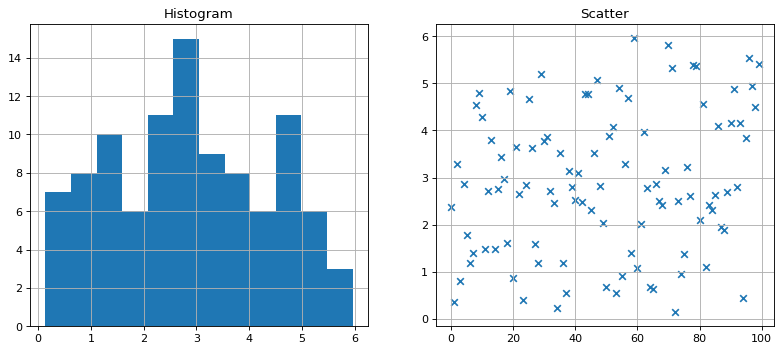

In [15]:
a = 6
b = 0
y = seq_uni*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 0.027; Variance: 1.012


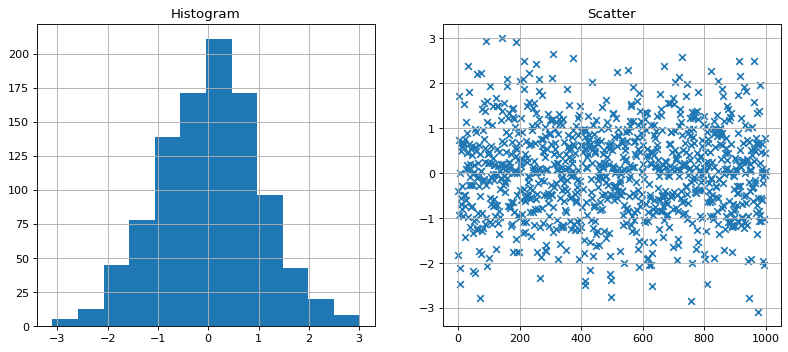

In [16]:
T = 1000
x = np.random.randn(T)
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(x, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), x,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(x):.3f}; Variance: {np.var(x):.3f}') 

Mean: 6.027; Variance: 1.012


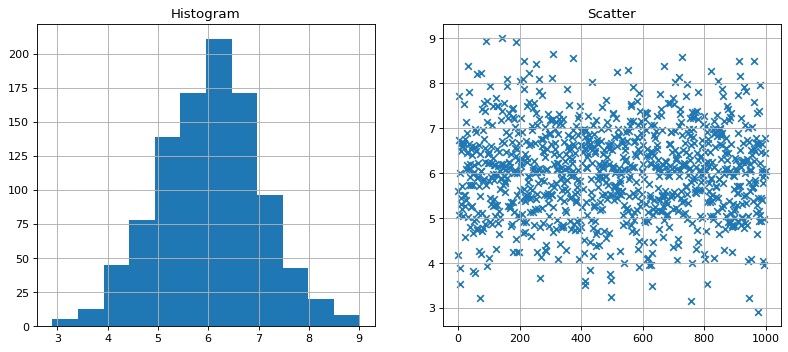

In [17]:
a = 1
b = 6
y = x*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y, marker='x')
plt.title("Scatter")
plt.grid()

print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 0.161; Variance: 36.416


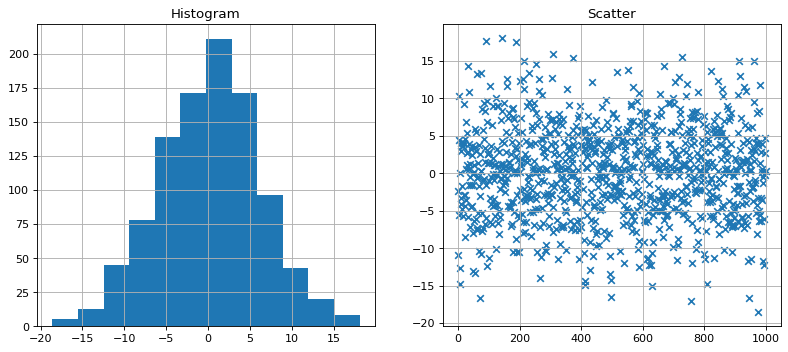

In [18]:
a = 6
b = 0
y = x*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean x: -0.021; Variance x: 1.093
Mean y: 0.019; Variance y: 0.988
Mean z: -0.002; Variance z: 1.966


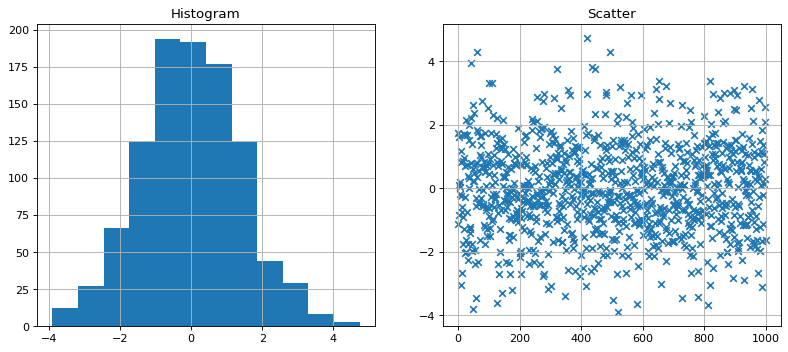

In [20]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = x + y
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(z, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), z, marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean x: {np.mean(x):.3f}; Variance x: {np.var(x):.3f}') 
print(f'Mean y: {np.mean(y):.3f}; Variance y: {np.var(y):.3f}') 
print(f'Mean z: {np.mean(z):.3f}; Variance z: {np.var(z):.3f}') 

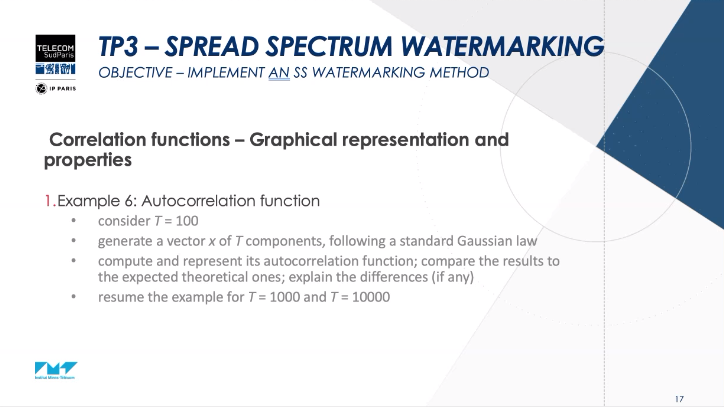

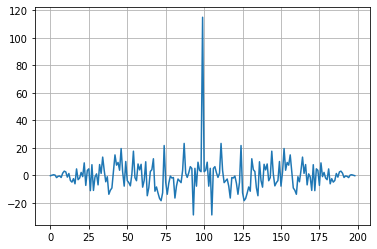

In [39]:
T = 100
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')

plt.plot(x_cor)
plt.grid()

In [37]:
print(f'Sum x: {np.sum(np.multiply(x,x))}')
print(f'Max x Cross-Correlation: {np.max(x_cor)}')

Sum x: 99.76843536952133
Max x Cross-Correlation: 99.76843536952133


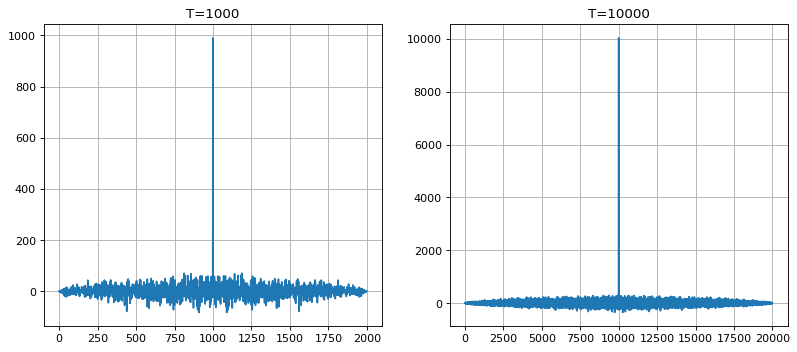

In [43]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
T = 1000
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')
plt.plot(x_cor)
plt.title('T=' + str(T))
plt.grid()
plt.subplot(1, 2, 2)
T = 10000
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')
plt.plot(x_cor)
plt.title('T=' + str(T))
plt.grid()

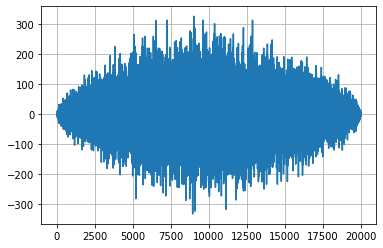

In [50]:
T = 10000
x = np.random.randn(T)
y = np.random.randn(T)

xy_cor = np.correlate(x, y, mode='full')

plt.plot(xy_cor)
plt.grid()

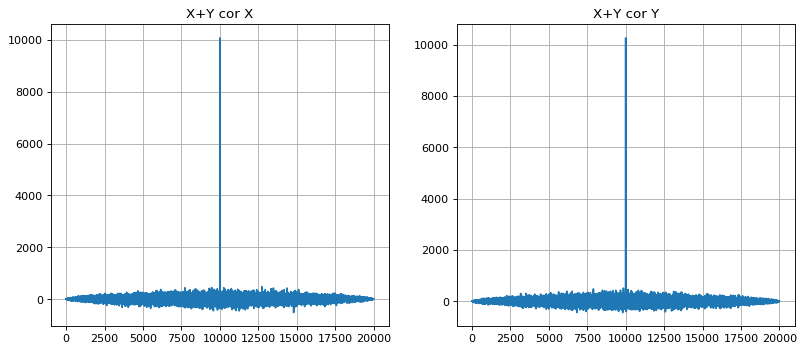

In [51]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
xy_cor = np.correlate(x+y, x, mode='full')
plt.plot(xy_cor)
plt.title('X+Y cor X')
plt.grid()
plt.subplot(1, 2, 2)
xy_cor = np.correlate(x+y, y, mode='full')
plt.plot(xy_cor)
plt.title('X+Y cor Y')
plt.grid()

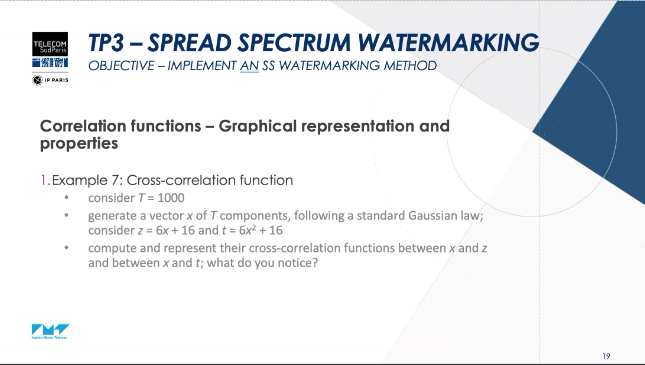

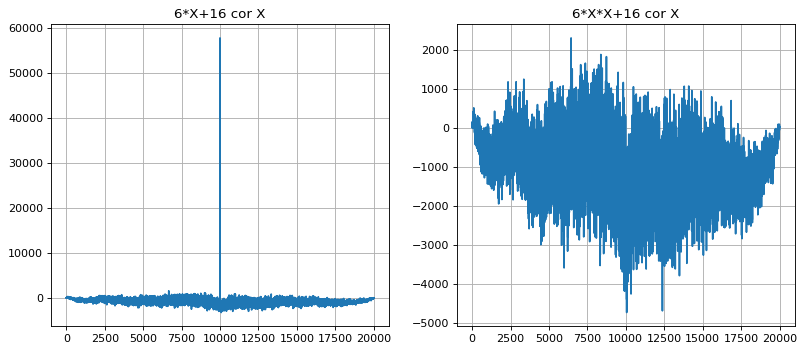

In [58]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
xy_cor = np.correlate(x, 6*x+16, mode='full')
plt.plot(xy_cor)
plt.title('6*X+16 cor X')
plt.grid()
plt.subplot(1, 2, 2)
xy_cor = np.correlate(x, 6*x*x+16, mode='full')
plt.plot(xy_cor)
plt.title('6*X*X+16 cor X')
plt.grid()

### CDMA

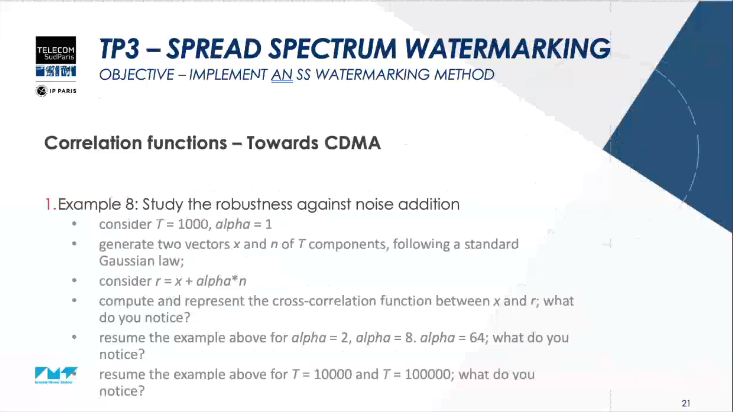

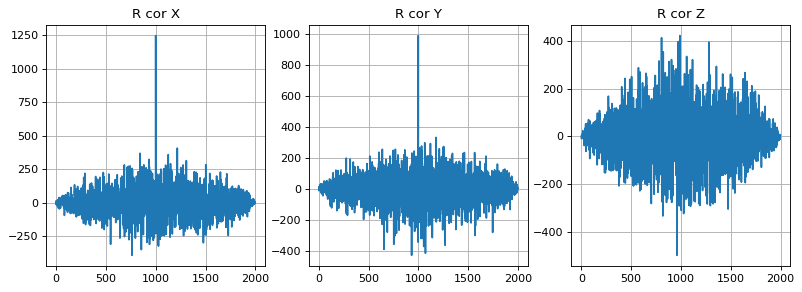

In [62]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = np.random.randn(T)
n = 4*np.random.randn(T)

r = x + y + n

plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
xy_cor = np.correlate(r, x, mode='full')
plt.plot(xy_cor)
plt.title('R cor X')
plt.grid()
plt.subplot(1, 3, 2)
xy_cor = np.correlate(r, y, mode='full')
plt.plot(xy_cor)
plt.title('R cor Y')
plt.grid()
plt.subplot(1, 3, 3)
xy_cor = np.correlate(r, z, mode='full')
plt.plot(xy_cor)
plt.title('R cor Z')
plt.grid()